In [1]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn.functional as F

In [2]:
pickle = '/home/nrk1787/slt_phase2/models/multimodal_transformer/data/debug/attn_wts_new_seq_seq.pkl'
out_dir = '/home/nrk1787/slt_phase2/models/multimodal_transformer/data/debug'

In [3]:
with open( pickle, 'rb' ) as f:
    obj = joblib.load( f )
len(obj)

642

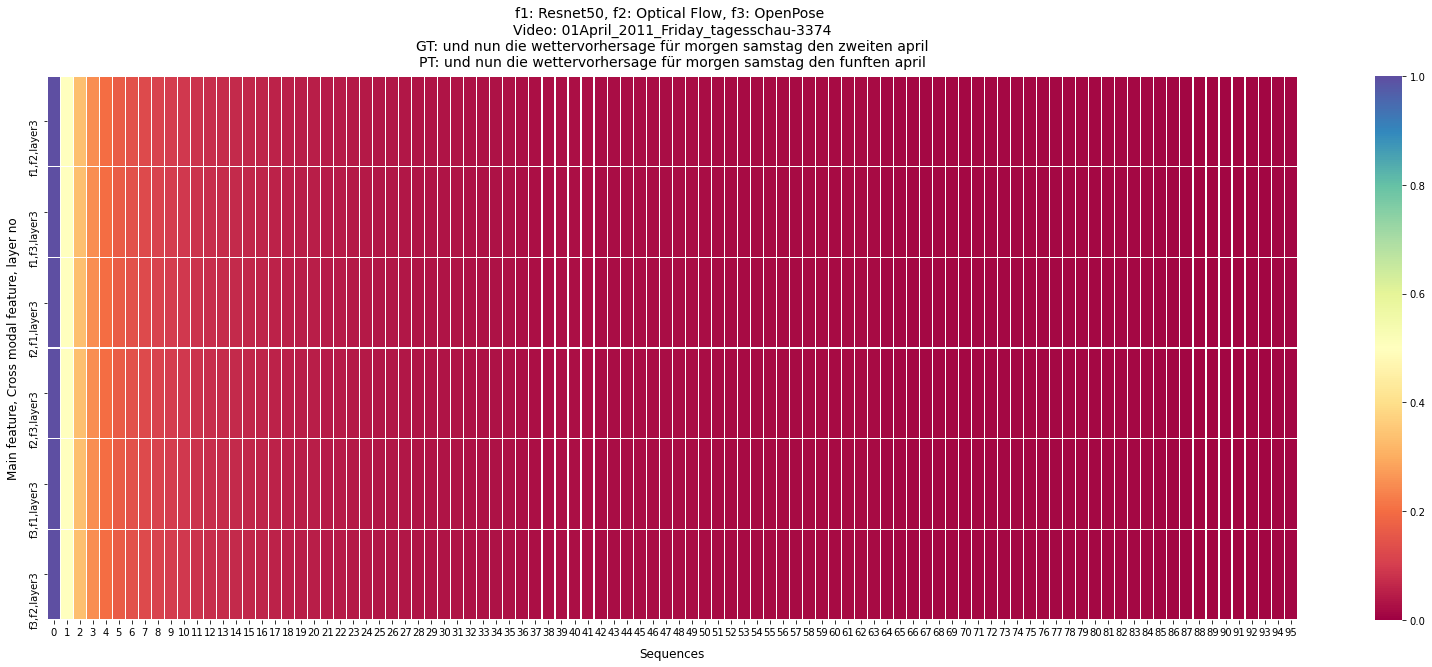

In [5]:
# vid = list(obj.keys())[0]
vid = '01April_2011_Friday_tagesschau-3374'
gt = 'und nun die wettervorhersage für morgen samstag den zweiten april'
pt = 'und nun die wettervorhersage für morgen samstag den funften april'
value = obj[ vid ]
df = pd.DataFrame()
layers = {}
for f in value.keys():
        for c in value[f].keys():
            for l, val in value[f][c].items():
                if l !='layer3':
                    continue
                val = np.amax( val, axis=1 )
                index = f'{f},{c},{l}'
                if l not in layers.keys():
                    layers[l] = [ index ]
                else:
                    layers[l].append( index )
                temp = pd.DataFrame( data=[val], index=[f'{f},{c},{l}'])
                df = temp if df.size==0 else df.append( temp )

resnet50 = '/home/nrk1787/slt_phase2/Datasets/GSL/resnet/test'
ft = os.path.join( resnet50, vid ) + '.npy'
seq = np.load(ft).shape[0]
df = df.iloc[:, :seq]
df = df/df.values.max()


plt.figure( figsize=(28,10) )
sns.heatmap( df, vmin=0, vmax=1, linewidths=.1, cmap='Spectral' )
# sns.heatmap( df, linewidths=.1, cmap='Spectral' )
plt.title( f'f1: Resnet50, f2: Optical Flow, f3: OpenPose \nVideo: {vid}\nGT: {gt}\nPT: {pt}' , fontsize=14, pad=10 )
plt.xlabel('Sequences', fontsize=12, labelpad=10)
# plt.set_ylabel('')
plt.ylabel('Main feature, Cross modal feature, layer no', fontsize=12, labelpad=10 )
plt.savefig( f'{out_dir}/{vid}.jpg' )
plt.show()           
            
           


